In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,mean_squared_error, r2_score

In [2]:
df = pd.read_csv("tumor.csv")
df

,Image,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,Image1,0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346,0.981939,7.458341e-155
1,Image2,0,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072,0.988834,7.458341e-155
2,Image3,1,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,0.268275,5.981800,0.978014,7.458341e-155
3,Image4,1,5.958145,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,0.243851,7.700919,0.964189,7.458341e-155
4,Image5,0,7.315231,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,0.501140,6.834689,0.972789,7.458341e-155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3757,Image3758,0,21.234512,1208.850174,34.768523,0.063774,2.082079,4.647310,158.437600,0.220666,0.048693,0.487131,5.211739,0.950972,7.458341e-155
3758,Image3759,0,20.435349,1227.151440,35.030721,0.066763,2.144625,4.882034,161.158675,0.225931,0.051045,0.502712,5.083126,0.952749,7.458341e-155
3759,Image3760,0,18.011520,1151.582765,33.934978,0.068396,2.308349,5.579498,167.130118,0.228930,0.052409,0.492269,5.103700,0.952181,7.458341e-155
3760,Image3761,0,13.330429,945.732779,30.752769,0.087872,2.732822,7.757570,223.812932,0.261527,0.068397,0.480064,6.439784,0.940898,7.458341e-155


In [3]:
#Find null values based on each column
nan_count = df.isna().sum()
nan_count

Image                 0
Class                 0
Mean                  0
Variance              0
Standard Deviation    0
Entropy               0
Skewness              0
Kurtosis              0
Contrast              0
Energy                0
ASM                   0
Homogeneity           0
Dissimilarity         0
Correlation           0
Coarseness            0
dtype: int64

In [4]:
df.describe()

,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
count,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3.762000e+03
mean,0.447368,9.488890,711.101063,25.182271,0.073603,4.102727,24.389071,127.961459,0.204705,0.058632,0.479252,4.698498,0.955767,7.458341e-155
std,0.497288,5.728022,467.466896,8.773526,0.070269,2.560940,56.434747,109.499601,0.129352,0.058300,0.127929,1.850173,0.026157,0.000000e+00
min,0.000000,0.078659,3.145628,1.773592,0.000882,1.886014,3.942402,3.194733,0.024731,0.000612,0.105490,0.681121,0.549426,7.458341e-155
25%,0.000000,4.982395,363.225459,19.058475,0.006856,2.620203,7.252852,72.125208,0.069617,0.004847,0.364973,3.412363,0.947138,7.458341e-155
50%,0.000000,8.477531,622.580417,24.951560,0.066628,3.422210,12.359088,106.737418,0.225496,0.050849,0.512551,4.482404,0.961610,7.458341e-155
75%,1.000000,13.212723,966.954319,31.095889,0.113284,4.651737,22.640304,161.059006,0.298901,0.089342,0.575557,5.723821,0.971355,7.458341e-155
max,1.000000,33.239975,2910.581879,53.949809,0.394539,36.931294,1371.640060,3382.574163,0.589682,0.347725,0.810921,27.827751,0.989972,7.458341e-155


In [5]:
#drop Coarseness due to the almost zero mean and no effect on the dataframe
df = df.drop(columns=['Coarseness'])

In [6]:
# Get the counts of individuals with and without tumor
counts = df['Class'].value_counts()

# Print the counts
print("Number of individuals with tumor (Class=1):", counts[1])
print("Number of individuals without tumor (Class=0):", counts[0])

# Get the total count of individuals
total_count = counts.sum()

# Calculate the percentage of individuals with and without tumor
pct_with_tumor = counts[1] / total_count * 100
pct_without_tumor = counts[0] / total_count * 100

# Print the percentages
print("Percentage of individuals with tumor (Class=1): {:.2f}%".format(pct_with_tumor))
print("Percentage of individuals without tumor (Class=0): {:.2f}%".format(pct_without_tumor))

Number of individuals with tumor (Class=1): 1683
Number of individuals without tumor (Class=0): 2079
Percentage of individuals with tumor (Class=1): 44.74%
Percentage of individuals without tumor (Class=0): 55.26%


[Text(0.5, 0, 'Class'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Distribution of Tumor')]

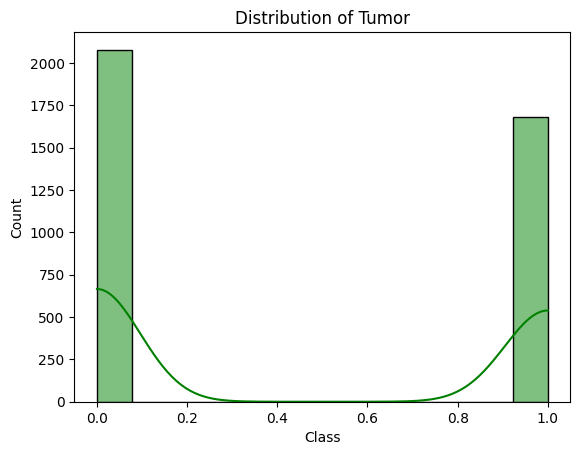

In [7]:
# Visualize the target variable
fig, ax = plt.subplots()
sns.histplot(df['Class'], kde=True, color='g', ax=ax)
ax.set(xlabel='Class', ylabel='Count', title='Distribution of Tumor')

C:\Users\Xenon\AppData\Local\Temp\ipykernel_280\354484670.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(grouped.get_group(1)['Energy'], label="Tumor", ax=ax[0])
C:\Users\Xenon\AppData\Local\Temp\ipykernel_280\354484670.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(grouped.get_group(0

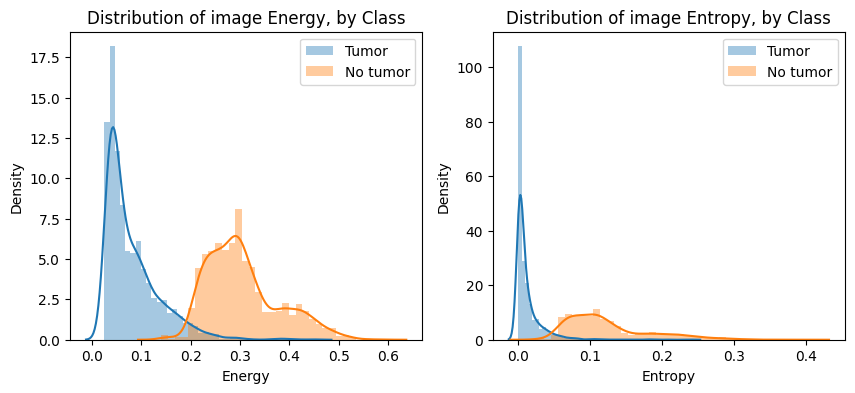

In [8]:
# group the data by Class
grouped = df.groupby('Class')

# create subplots for the two distributions
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# plot the distribution of Energy by Class
sns.distplot(grouped.get_group(1)['Energy'], label="Tumor", ax=ax[0])
sns.distplot(grouped.get_group(0)['Energy'], label="No tumor", ax=ax[0])
ax[0].set_title("Distribution of image Energy, by Class")
ax[0].legend()

# plot the distribution of Entropy by Class
sns.distplot(grouped.get_group(1)['Entropy'], label="Tumor", ax=ax[1])
sns.distplot(grouped.get_group(0)['Entropy'], label="No tumor", ax=ax[1])
ax[1].set_title("Distribution of image Entropy, by Class")
ax[1].legend()

# show the plot
plt.show()

<Axes: >

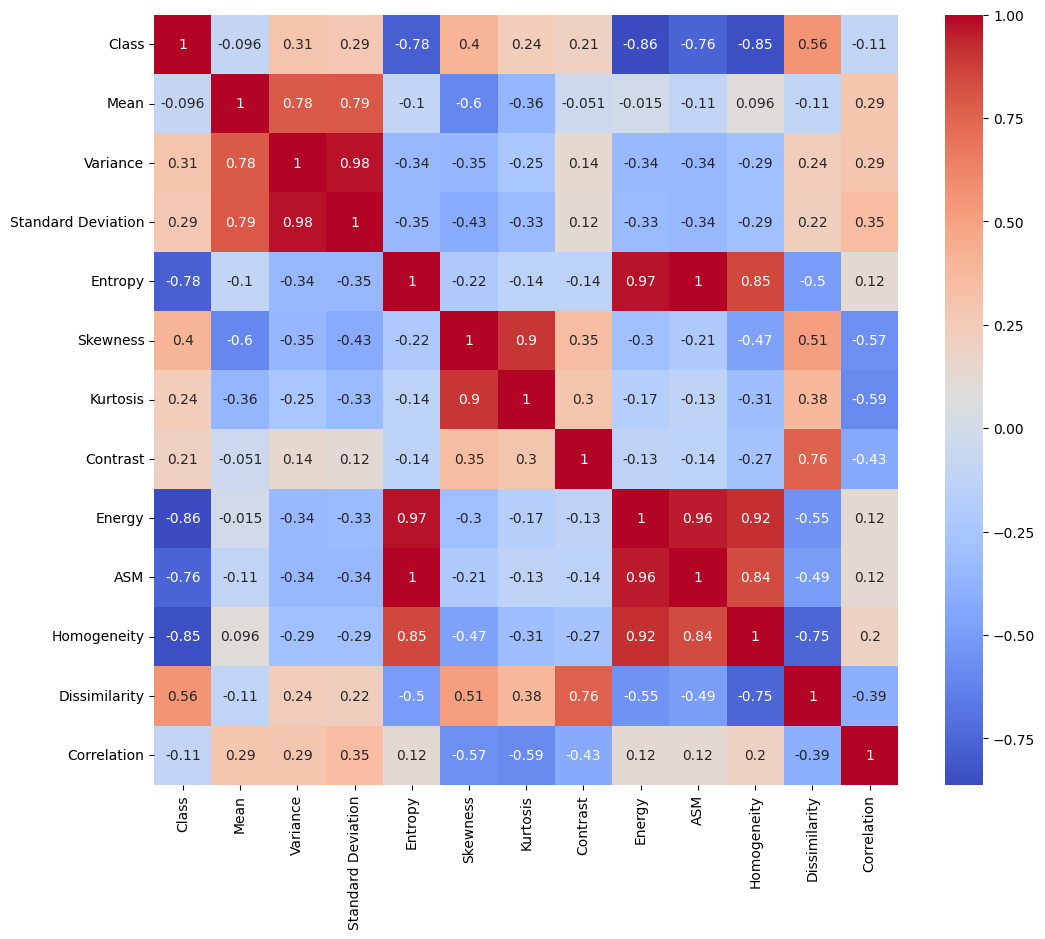

In [9]:
# Select only the integer and float columns
int_cols = df.select_dtypes(include=['int64','float64']).columns
int_df = df[int_cols]
# Create a correlation matrix
corr_matrix = int_df.corr()

# Create a heatmap using seaborn
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

In [10]:
# Split the data into X and y 

# Remove Class and Image columns
X = df.drop(columns=["Class","Image"])
# Set target
y = df["Class"]

In [11]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=24)

In [12]:
# Create a logistic regression model
log_reg = LogisticRegression(max_iter=1000)

# Fit the model to the training data
log_reg.fit(X_train, y_train)

# Evaluate the model on the testing data
accuracy = log_reg.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9761273209549072


In [13]:
# Use the model to make predictions on the test data
y_pred = log_reg.predict(X_test)

In [14]:
from sklearn.model_selection import cross_val_score

# Create a logistic regression model
log_reg = LogisticRegression(max_iter=1000)

# 10-fold cross validation
scores = cross_val_score(log_reg, X, y, cv=10)

# Print the mean accuracy and standard deviation of the model
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.97 (+/- 0.02)


In [15]:
# Evaluate the model using classification report
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       195
           1       1.00      0.95      0.97       182

    accuracy                           0.98       377
   macro avg       0.98      0.98      0.98       377
weighted avg       0.98      0.98      0.98       377



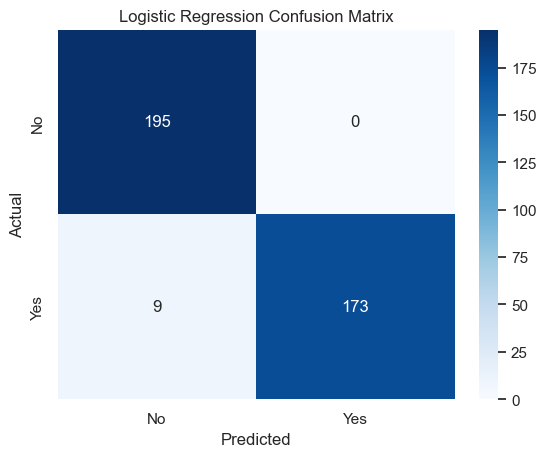

In [16]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
sns.set_theme()
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

In [17]:
# Evaluate the performance of the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("R-squared: {:.3f}".format(r2))
print("MSE: {:.2f}".format(mse))

R-squared: 0.904
MSE: 0.02
